In [1]:
import pandas as pd
import numpy as np
import nltk
import string as s
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\sasi
[nltk_data]     kiran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
train = pd.read_csv("C:\\Users\\sasi kiran\\Desktop\\ag_news_csv\\train.csv",header=0,names=['classid','title','desc'])
test = pd.read_csv("C:\\Users\\sasi kiran\\Desktop\\ag_news_csv\\test.csv",header=0,names=['classid','title','desc'])

In [10]:
train.head()

,classid,title,desc
0,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
1,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
2,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
3,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
4,3,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...


In [11]:
test.head()

,classid,title,desc
0,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
1,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
2,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
3,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
4,4,Open Letter Against British Copyright Indoctri...,The British Department for Education and Skill...


In [12]:
train.isnull().sum()

classid    0
title      0
desc       0
dtype: int64

In [13]:
X_train=train.desc[:60000]
X_test=test.desc
y_train=train.classid[:60000]
y_test=test.classid

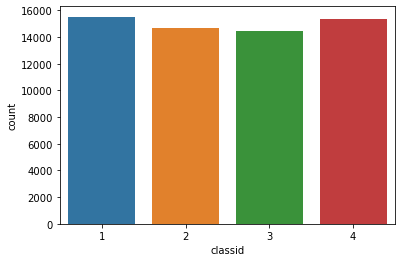

In [14]:
df=train[:60000]
sns.countplot(df.classid);

In [15]:
world_news = df.desc[df.classid[df.classid==1].index]

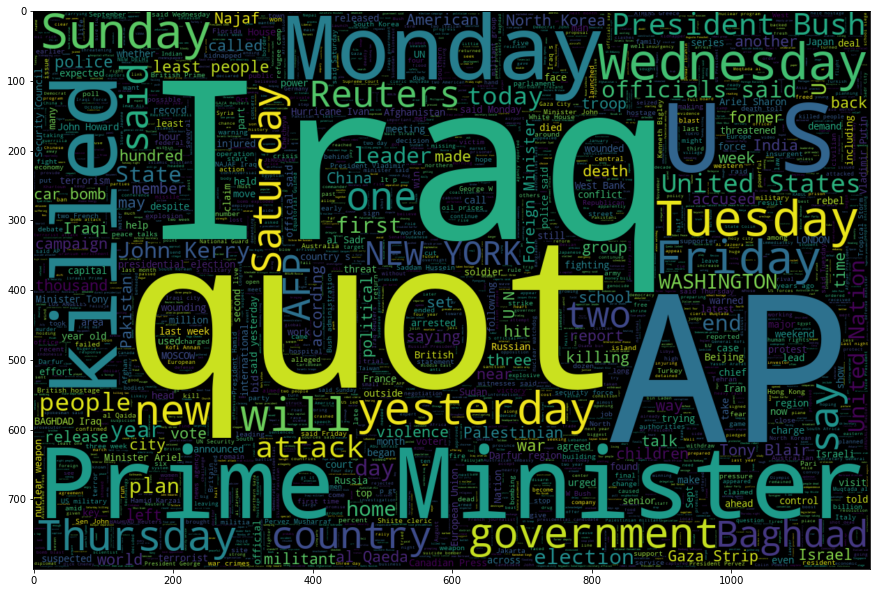

In [9]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(world_news))
plt.imshow(wordcloud,interpolation = 'bilinear');

In [10]:
sports = df.desc[df.classid[df.classid==2].index]

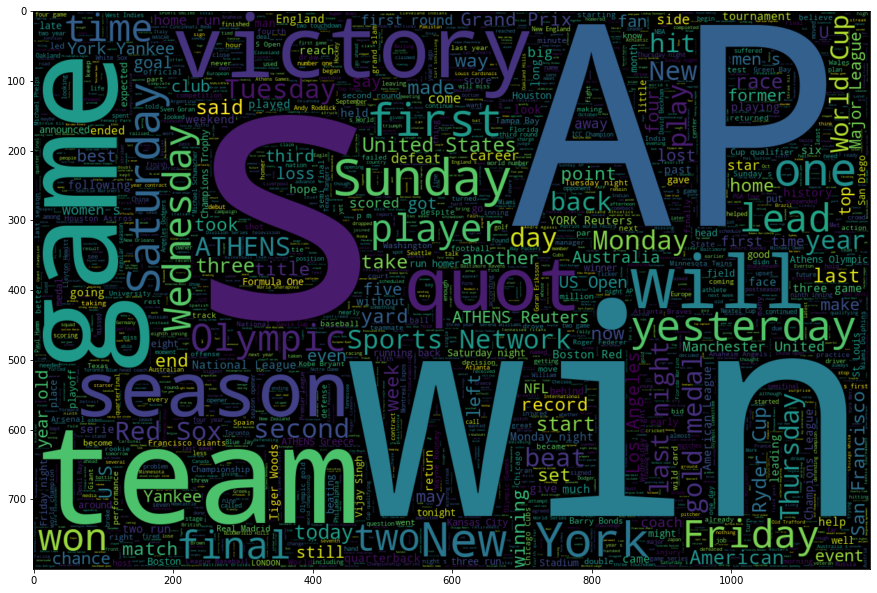

In [11]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(sports))
plt.imshow(wordcloud,interpolation = 'bilinear')

In [12]:
business = df.desc[df.classid[df.classid==3].index]

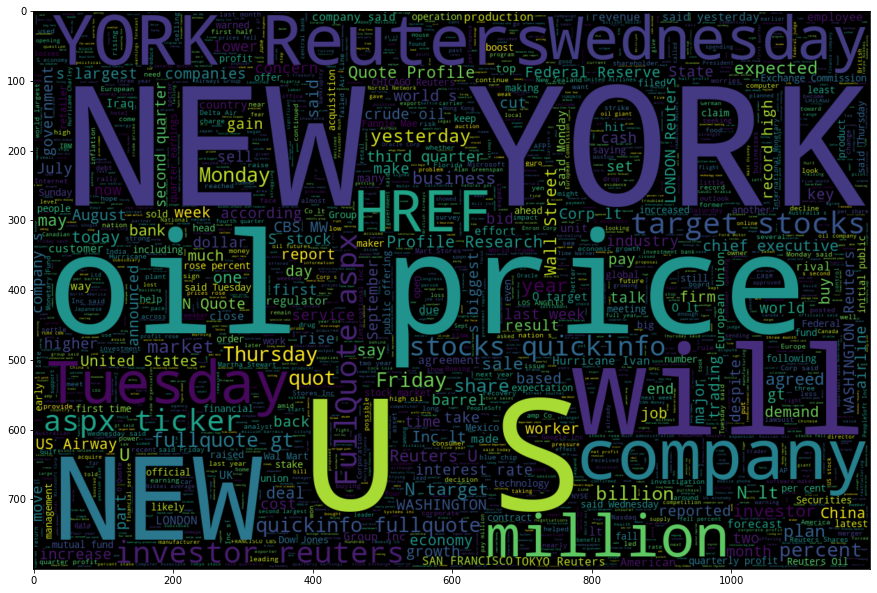

In [13]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(business))
plt.imshow(wordcloud,interpolation = 'bilinear');

In [14]:
sci_tech = df.desc[df.classid[df.classid==4].index]

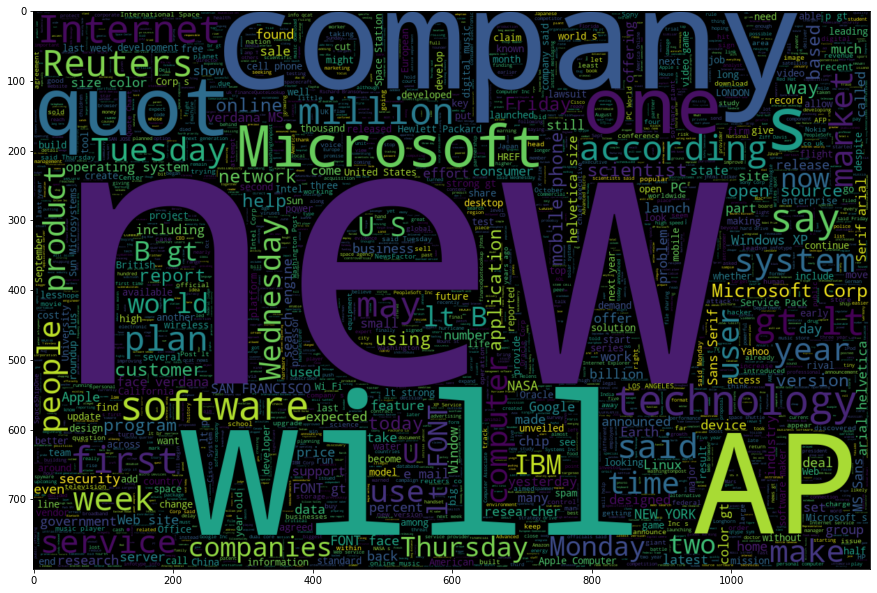

In [15]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(sci_tech))
plt.imshow(wordcloud,interpolation = 'bilinear');

In [16]:
def tokenization(text):
    lst=text.split()
    return lst
X_train=X_train.apply(tokenization)
X_test=X_test.apply(tokenization)

In [17]:
def lowercasing(lst):
    new_lst=[]
    for  i in  lst:
        i=i.lower()
        new_lst.append(i) 
    return new_lst
X_train=X_train.apply(lowercasing)
X_test=X_test.apply(lowercasing)

In [18]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for  j in  s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
X_train=X_train.apply(remove_punctuations) 
X_test=X_test.apply(remove_punctuations)

In [19]:
def remove_numbers(lst):
    lst1=[]
    new_lst=[]

    for i in  lst:
        for j in  s.digits:
            i=i.replace(j,'')
        lst1.append(i)
    for i in  lst1:
        if  i!='':
            new_lst.append(i)
    return new_lst
X_train=X_train.apply(remove_numbers)
X_test=X_test.apply(remove_numbers)

In [20]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

X_train=X_train.apply(remove_stopwords)
X_test=X_test.apply(remove_stopwords) 

In [21]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
X_train=X_train.apply(lemmatzation)
X_test=X_test.apply(lemmatzation)

In [23]:
X_train=X_train.apply(lambda x: ''.join(i+' ' for i in x))
X_test=X_test.apply(lambda x: ''.join(i+' '  for i in x))

In [24]:
from sklearn.feature_extraction.text  import TfidfVectorizer

In [25]:
tfidf=TfidfVectorizer(max_features=10000,min_df=6)
train_1=tfidf.fit_transform(X_train)
test_1=tfidf.transform(X_test)
print("No. of features extracted")
print(len(tfidf.get_feature_names()))
print(tfidf.get_feature_names()[:20])

train_arr=train_1.toarray()
test_arr=test_1.toarray()

No. of features extracted
10000
['aa', 'aapl', 'aaron', 'ab', 'ababa', 'abandon', 'abandoned', 'abandoning', 'abarrel', 'abbey', 'abc', 'abducted', 'abduction', 'abductor', 'abdul', 'abdullah', 'ability', 'ablaze', 'able', 'aboard']


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import  confusion_matrix

In [ ]:
RF=RandomForestClassifier()
RF.fit(train_arr,y_train)
pred=RF.predict(test_arr)

print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

In [28]:
def eval_model(y,y_pred):
    print("F1 score of the model")
    print(f1_score(y,y_pred,average='micro'))
    print("Accuracy of the model")
    print(accuracy_score(y,y_pred))
    print("Accuracy of the model in percentage")
    print(round(accuracy_score(y,y_pred)*100,3),"%")

In [29]:
def confusion_mat(color):
    cof=confusion_matrix(y_test, pred)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

In [30]:
eval_model(y_test,pred)
    
a=round(accuracy_score(y_test,pred)*100,3)

F1 score of the model
0.8598499802605606
Accuracy of the model
0.8598499802605606
Accuracy of the model in percentage
85.985 %


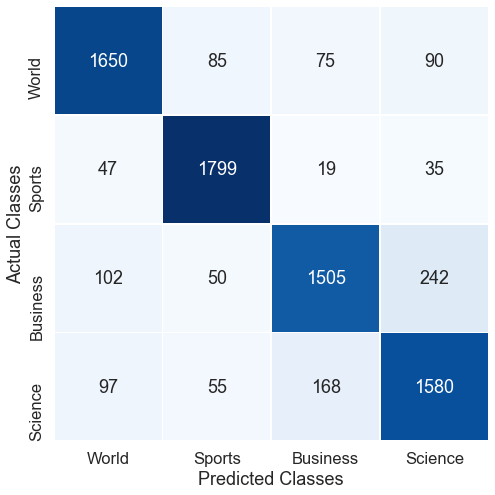

In [31]:
confusion_mat('Blues')